<a href="https://colab.research.google.com/github/shindejayesh987/Neural-Networks-Zero-to-Hero-By-Andrej-Karpathy/blob/main/gpt_dev_part6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Preparing the data

## 1.1- Opening and Exploring the Data

In [ ]:
with open("/content/shakespere.txt", "r", encoding="utf-8") as f:
    text = f.read()

print(f"length of dataset in characters: {len(text)}")

length of dataset in characters: 1115393


In [ ]:
print(f"first 1000 characters of dataset:\n{text[:1000]}")

first 1000 characters of dataset:
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for b

## 1.2- Tokenization

In [ ]:
chars = sorted(list(set(text)))
vocab_size = len(chars)

print(f"all chars are:{''.join(chars)}")
print(f"vocab size: {vocab_size}")

all chars are:
 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
vocab size: 65


In [ ]:
stoi = {ch:i for i, ch in enumerate(chars)}
itos = {val:key for key, val in stoi.items()}

encode = lambda s: [stoi[c] for c in s]
decode = lambda l: ''.join([itos[i] for i in l])

print(encode("Hello, world!"))
print(decode(encode("Hello, world!")))

[20, 43, 50, 50, 53, 6, 1, 61, 53, 56, 50, 42, 2]
Hello, world!


In [ ]:
import torch
data = torch.tensor(encode(text), dtype = torch.long)

print(f"data shape: {data.shape}")
print(f"data type: {data.dtype}")

print("-"*50)

print(f"first 100 characters of dataset:\n{data[:100]}")
print(f"first 100 characters of dataset:\n{decode(data[:100].tolist())}")

data shape: torch.Size([1115393])
data type: torch.int64
--------------------------------------------------
first 100 characters of dataset:
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59])
first 100 characters of dataset:
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


## 1.3- Train Validation Split

In [ ]:
n = int(0.9 * len(data))

train_data = data[:n]
val_data = data[n:]

## 1.4 Create DataLoader

In [ ]:
block_size = 8
train_data[:block_size + 1]

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])

In [ ]:
x = train_data[:block_size]
y = train_data[1:block_size + 1]

for t in range(block_size):
    context = x[:t + 1]
    target = y[t]
    print(f"when input tensor is {context.tolist()}, target is {target}")

when input tensor is [18], target is 47
when input tensor is [18, 47], target is 56
when input tensor is [18, 47, 56], target is 57
when input tensor is [18, 47, 56, 57], target is 58
when input tensor is [18, 47, 56, 57, 58], target is 1
when input tensor is [18, 47, 56, 57, 58, 1], target is 15
when input tensor is [18, 47, 56, 57, 58, 1, 15], target is 47
when input tensor is [18, 47, 56, 57, 58, 1, 15, 47], target is 58


In [ ]:
torch.manual_seed(1337)
batch_size = 4 # how many independent sequences will we process in parallel
block_size = 8 # what is the maximum context length for predictions?

# number of input_examples = batch_size * block_size (4 * 8 = 32)

def get_batch(split):
    # Select the appropriate dataset based on the split parameter
    data = train_data if split == "train" else val_data

    # Generate a batch of random starting indices within the dataset
    ix = torch.randint(len(data) - block_size, (batch_size,))

    # Select a block of text of size block_size starting from each random index
    x = torch.stack([data[i:i+block_size] for i in ix])

    # Shift the selected block of text by one character to the right to create the target sequence
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x, y

xb, yb = get_batch("train")
print(f"inputs:\nshape{xb.shape}\ndata: {xb}")
print(f"targets:\nshape{yb.shape}\ndata: {yb}")

inputs:
shapetorch.Size([4, 8])
data: tensor([[53, 59,  6,  1, 58, 56, 47, 40],
        [49, 43, 43, 54,  1, 47, 58,  1],
        [13, 52, 45, 43, 50, 53,  8,  0],
        [ 1, 39,  1, 46, 53, 59, 57, 43]])
targets:
shapetorch.Size([4, 8])
data: tensor([[59,  6,  1, 58, 56, 47, 40, 59],
        [43, 43, 54,  1, 47, 58,  1, 58],
        [52, 45, 43, 50, 53,  8,  0, 26],
        [39,  1, 46, 53, 59, 57, 43,  0]])


# 2- Bigram Language Model
simplest language model

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F

import matplotlib.pyplot as plt

torch.manual_seed(1337)

## 2.1 Creating the Model

In [ ]:
class BigramLanguageModel(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()
        # each token directly reads off the logits for the next token from a loockup table
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, idx, targets = None):
        # idx and targets are both (B, T) tensor of ints
        logits = self.token_embedding_table(idx) # (B, T, C) = (4, 8 , vocab_size)

        if targets is None:
            loss = None
        else:
            # note that F.cross_entropy accepts inputs in shape (B, C, T)
            B, T, C = logits.shape
            logits = logits.view(B * T, C)
            targets = targets.view(B * T) # can be as targets = targets.view(-1)

            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # get the logits for the next token
            logits, loss = self(idx)
            # focus only on the last time step
            # (note that we are feeding the whole context each time, however we only care about the last prediction)
            # (this make doesn't make sense now, but the function will be modified later)
            logits = logits[:, -1, :] # Becomes (B, C) (get the last time step for each sequence)
            # apply softmax to convert to probabilities
            probs = F.softmax(logits, dim = -1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled token to the context
            idx = torch.cat((idx, idx_next), dim = 1) # (B, T + 1)
        return idx


m = BigramLanguageModel(vocab_size)
logits, loss = m(xb, yb)

print(f"logits shape: {logits.shape}")
print(f"loss: {loss} | we are expecting a loss of around {torch.log(torch.tensor(vocab_size))}")

logits shape: torch.Size([32, 65])
loss: 4.894842624664307 | we are expecting a loss of around 4.174387454986572


In [ ]:
idx = torch.zeros((1,1), dtype = torch.long)
generated = m.generate(idx, 100) # shape (1, 101)
print(decode(generated[0].tolist()))


Sr?qP-QWktXoL&jLDJgOLVz'RIoDqHdhsV&vLLxatjscMpwLERSPyao.qfzs$Ys$zF-w,;eEkzxjgCKFChs!iWW.ObzDnxA Ms$3


## 2.2- Training the Model

In [ ]:
optimizer = torch.optim.AdamW(m.parameters(), lr = 1e-3)
batch_size = 32
lossi = []

for i in range(10000):
    # sample a batch of training data
    xb, yb = get_batch("train")

    # evaluate the loss
    logits, loss = m(xb, yb)
    optimizer.zero_grad(set_to_none = True)
    loss.backward()
    optimizer.step()

    lossi.append(loss.item())

print(f"loss: {loss.item()}")

loss: 2.4699912071228027


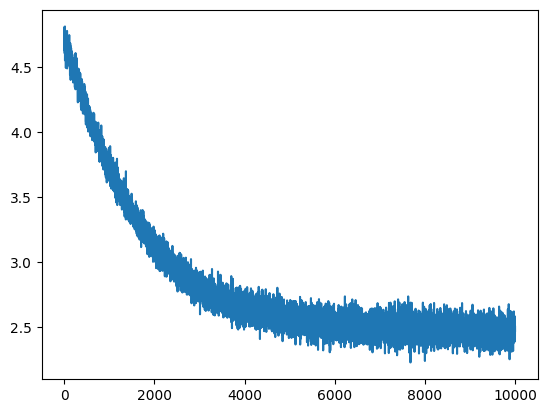

In [ ]:
plt.plot(lossi);

In [ ]:
# sampling from the model
idx = torch.zeros((1,1), dtype = torch.long)
generated = m.generate(idx, 400) # shape (1, 101)
print(decode(generated[0].tolist()))


Iyoteng h hasbe pave pirance
Rie hicomyonthar's
Plinseard ith henouratucenonthioneir thondy, y heltieiengerofo'dsssit ey
KIN d pe wither vouprrouthercc.
hathe; d!
My hind tt hinig t ouchos tes; st yo hind wotte grotonear 'so it t jod weancotha:
h haybet--s n prids, r loncave w hollular s O:
HIs; ht anjx?

DUThinqunt.

LaZAnde.
athave l.
KEONH:
ARThanco be y,-hedarwnoddy scat t tridesar, wnl'shenou


## 2.3- Porting our code to a script
check `bigram.py`

# 3- Self Attention Trick (Averaging the previous tokens embeddings)

- we need each token commuinicate with all previous tokens, for example: the 5th token communicate with 1st, 2nd, 3rd, 4th tokens

- since we are predicting the next token, we need to consider the previous tokens only

- The easiset way to make them communicate is averaging the previous tokens embeddings (it's kinda lossy since we are losing the spatial information)

## 3.1- Using Explicit loops

In [ ]:
torch.manual_seed(1337)
B, T, C = 4, 8, 2 # batch size, time, channels
x = torch.randn(B, T, C)
print(f"x shape: {x.shape}")

# We want x[b, t] = mean_(i<=t) x[b, i]
xbow = torch.zeros((B, T, C))
for b in range(B):
    for t in range(T):
        xprev = x[b, :t+1] # (t, C)
        xbow[b, t] = torch.mean(xprev, dim = 0) # average over time dimension (t)

x shape: torch.Size([4, 8, 2])


In [ ]:
# Let's Check the first Batch
print(f"x[0]: {x[0]}")
print(f"xbow[0]: {xbow[0]}")

# the first row is the same
print(x[0, 0] == xbow[0, 0])
# the second row is the average of the first two rows
print((x[0, 0] + x[0, 1]) / 2 == xbow[0, 1])
# etc ...

x[0]: tensor([[ 0.1808, -0.0700],
        [-0.3596, -0.9152],
        [ 0.6258,  0.0255],
        [ 0.9545,  0.0643],
        [ 0.3612,  1.1679],
        [-1.3499, -0.5102],
        [ 0.2360, -0.2398],
        [-0.9211,  1.5433]])
xbow[0]: tensor([[ 0.1808, -0.0700],
        [-0.0894, -0.4926],
        [ 0.1490, -0.3199],
        [ 0.3504, -0.2238],
        [ 0.3525,  0.0545],
        [ 0.0688, -0.0396],
        [ 0.0927, -0.0682],
        [-0.0341,  0.1332]])
tensor([True, True])
tensor([True, True])


## 3.2- Using Matrix Multiplication
- instead of nested loops, we can make it using matrix multiplication
- This can be done by multiplying the matrix with lower triangular matrix

In [ ]:

torch.manual_seed(42)
# lower triangular matrix of ones
a = torch.tril(torch.ones(3,3))
# make all rows sum to 1
a = a / torch.sum(a, 1, keepdim = True)
# create a random matrix
b = torch.randint(0, 10, (3, 2)).float()

c = a @ b
print(f"a (shape = {a.shape}) =\n{a}")
print(f"b (shape = {b.shape}) =\n{b}")
print(f"c (shape = {c.shape}) =\n{c}")

a (shape = torch.Size([3, 3])) =
tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000],
        [0.3333, 0.3333, 0.3333]])
b (shape = torch.Size([3, 2])) =
tensor([[2., 7.],
        [6., 4.],
        [6., 5.]])
c (shape = torch.Size([3, 2])) =
tensor([[2.0000, 7.0000],
        [4.0000, 5.5000],
        [4.6667, 5.3333]])


In [ ]:
# We want x[b, t] = mean_(i<=t) x[b, i]
wei = torch.tril(torch.ones(T, T)) # (T, T)
# make all rows sum to 1
wei = wei / torch.sum(wei, 1, keepdim = True) # (T, T)
xbow2 = wei @ x # (T, T) @ (B, T, C) ----broadcasting----> (B, T, T) @ (B, T, C) ➡️ (B, T, C)

# check if xbow2 is the same as xbow
print(torch.allclose(xbow, xbow2, atol = 1e-7))

True


## 3.3- Using Softmax

In [ ]:
tril = torch.tril(torch.ones(T, T))
# we start with zeros, but later these will be replaced with data dependent values (affinities)
wei = torch.zeros((T, T))
# masked_fill: for all elements where tril == 0, replace with float("-inf")
wei = wei.masked_fill(tril == 0, float("-inf"))
print(f"wei:\n{wei}")
wei = F.softmax(wei, dim = -1)
print(f"wei:\n{wei}")
xbow3 = wei @ x

# check if xbow3 is the same as xbow
print(torch.allclose(xbow, xbow3, atol = 1e-7))

wei:
tensor([[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0., 0., 0., 0.]])
wei:
tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])
True

# 4- Minor Code Cleanup
(these modifications are done in `bigram.py`)


## 4.1- Adding variable embedding size
1. removing vocab_size from the constructor of `BigramLanguageModel` class, since it's already defiend above
2. Modifying the embedding layer to has an output size of `n_embed` instead of `vocab_size`
3. Adding a linear layer with `vocab_size` outputs after the embedding layer

In [ ]:
class BigramLanguageModel(nn.Module):
    # no need to pass vocab_size as an argument, since it is a global variable in this file
    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a loockup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embed)
        # the output layer is a linear layer with vocab_size outputs
        self.lm_head = nn.Linear(n_embed, vocab_size)

    def forward(self, idx, targets = None):
        # idx and targets are both (B, T) tensor of ints
        token_emb = self.token_embedding_table(idx) # (B, T, C) = (4, 8 , vocab_size)
        logits = self.lm_head(token_emb) # (B, T, vocab_size) = (4, 8, vocab_size)

    # rest of the code ..

## 4.2- Positional Encoding
1. Adding a positional encoding layer to the model `self.position_embedding_table`
2. Adding the positional encoding to the input embeddings `x = token_emb + pos_emb`

In [ ]:
class BigramLanguageModel(nn.Module):
    # no need to pass vocab_size as an argument, since it is a global variable in this file
    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a loockup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embed)
        # each position is also associated with an embedding vector
        self.position_embedding_table = nn.Embedding(block_size, n_embed)
        # the output layer is a linear layer with vocab_size outputs
        self.lm_head = nn.Linear(n_embed, vocab_size)

    def forward(self, idx, targets = None):
        B, T = idx.shape
        # idx and targets are both (B, T) tensor of ints
        token_emb = self.token_embedding_table(idx) # (B, T, C) = (4, 8 , vocab_size)
        pos_emb = self.position_embedding_table(torch.arange(T, device = idx.device)) # (T, C) = (8, vocab_size)
        # x has the token identities + the position embeddings
        x = token_emb + pos_emb # (B, T, C) = (4, 8, vocab_size)
        logits = self.lm_head(x) # (B, T, vocab_size) = (4, 8, vocab_size)

    # rest of the code ..

# 5- Self Attention
Consider his as `version 4 ` of part 3

## 5.1- Previous code from part 3

In [ ]:
torch.manual_seed(1337)
B, T, C = 4, 8, 32 # batch, time, channels
x = torch.randn(B, T, C)

tril = torch.tril(torch.ones(T, T))
wei = torch.zeros((T, T))
wei = wei.masked_fill(tril == 0, float("-inf"))
wei = F.softmax(wei, dim = -1)

out = wei @ x

print(f"tril:\n{tril}")
print(f"wei:\n{wei}")
print(f"out.shape:\n{out.shape}")


tril:
tensor([[1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])
wei:
tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])
out.shape:
torch.Size([4, 8, 32])


## 5.2- Building the Self-Attention
each token (can be called node too) at each position emmits 2 vectors:
1. Query: What I'm looking for?
2. Key: What do I contain?
3. Value: What I will tell you or the information I have `in this head`?
    
- affinities between tokens `wei` = my Query @ all Keys
- if key and query are aligned ➡️ high value ➡️ learn more about this sequence
- instead of multiplying wei with tokens directly, we multiply it with values (which is the information we want to learn about)

In [ ]:
torch.manual_seed(1337)
B, T, C = 4, 8, 32 # batch, time, channels

# x is private information of each token
x = torch.randn(B, T, C)

# single Head perform self-attention
head_size = 16
key = nn.Linear(C, head_size, bias = False)
query = nn.Linear(C, head_size, bias = False)
value = nn.Linear(C, head_size, bias = False)


k = key(x) # (B, T, head_size) = (4, 8, 16)
q = query(x) # (B, T, head_size) = (4, 8, 16)

# now every token in every batch is associated with a key and a query (in parallel), no communication between tokens has happened yet

wei = q @ k.transpose(-2, -1) # (B, T, head_size) @ (B, head_size, T) = (B, T, T)
tril = torch.tril(torch.ones(T, T))
# wei are no longer zeros, but data dependent values (affinities)
# wei = torch.zeros((T, T))
wei = wei.masked_fill(tril == 0, float("-inf"))
wei = F.softmax(wei, dim = -1)

print(f"wei[0]: {wei[0]}")

# multiply with value instead of x
v = value(x) # (B, T, head_size) = (4, 8, 16)
out = wei @ v # (B, T, T) @ (B, T, head_size) = (B, T, head_size)
# out = wei @ x


wei[0]: tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1574, 0.8426, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2088, 0.1646, 0.6266, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5792, 0.1187, 0.1889, 0.1131, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0294, 0.1052, 0.0469, 0.0276, 0.7909, 0.0000, 0.0000, 0.0000],
        [0.0176, 0.2689, 0.0215, 0.0089, 0.6812, 0.0019, 0.0000, 0.0000],
        [0.1691, 0.4066, 0.0438, 0.0416, 0.1048, 0.2012, 0.0329, 0.0000],
        [0.0210, 0.0843, 0.0555, 0.2297, 0.0573, 0.0709, 0.2423, 0.2391]],
       grad_fn=<SelectBackward0>)


## 5.3- Notes About Self Attention

1. Attention is a **communication mechanism**. Can be seen as nodes in a directed graph looking at each other and aggregating information with a weighted sum from all nodes that point to them, with data-dependent weights.

2. There is no notion of space. Attention simply acts over a set of vectors. **This is why we need to positionally encode tokens.**

3. Each example across batch dimension is of course processed completely **independently** and **never "talk" to each other**

4. In an `encoder` attention block just delete the single line that does masking with `tril`, **allowing all tokens to communicate**, it can be used for some applications like translation and sentiment analysis. This block here is called a "decoder" attention block because it has triangular masking, and is usually used in autoregressive settings, like **language modeling**.

5. `self-attention` just means that the **keys** and **values** are **produced from the same source** as **queries**. In "cross-attention", the **queries** still get produced from **x**, but the **keys** and **values** come from some other, external source (e.g. an **encoder** module)

6. `Scaled Dot-Product Attention`: $\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$

    `Scaled` attention additional divides `wei` by $\frac{1}{\sqrt{\text{head\_size}}}$. This makes it so when input `Q`, `K` are unit variance, `wei` will be **unit variance** too and Softmax will stay diffuse and **not saturate** too much. it's important especially in initialization.

    if the **variance** is **very high**, **softmax** will **converge** to **one-hot vector**

In [ ]:
# Scaled Attention
k = torch.randn(B, T, head_size)
q = torch.randn(B, T, head_size)

print("Unscaled Attention")
wei = q @ k.transpose(-2, -1)
print(f"var(k) = {torch.var(k)}")
print(f"var(q) = {torch.var(q)}")
print(f"var(wei) = {torch.var(wei)}")

print("\nScaled Attention")
wei = q @ k.transpose(-2, -1) * (head_size ** -0.5)
print(f"var(k) = {torch.var(k)}")
print(f"var(q) = {torch.var(q)}")
print(f"var(wei) = {torch.var(wei)}")

Unscaled Attention
var(k) = 1.044861912727356
var(q) = 1.0700464248657227
var(wei) = 17.46897315979004

Scaled Attention
var(k) = 1.044861912727356
var(q) = 1.0700464248657227
var(wei) = 1.0918108224868774


## 5.4- Adding single Self Attention Head to the Bigram Language Model

### 5.4.1- Making new `Head` class

In [ ]:
# Making the Head Class
class Head(nn.Module):
    """ one head of self attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embed, head_size, bias = False)
        self.query = nn.Linear(n_embed, head_size, bias = False)
        self.value = nn.Linear(n_embed, head_size, bias = False)
        # since tril isn't a parameter, we register it as a buffer
        self.register_buffer("tril", torch.tril(torch.ones(block_size, block_size)))

    def forward(self, x):
        B, T, C = x.shape
        k = self.key(x) # (B, T, C)
        q = self.query(x) # (B, T, C)

        # compute attention scores (affinities)
        wei = q @ k.transpose(-2, -1) * (C ** -0.5) # (B, T, C) @ (B, C, T) = (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0 , float("-inf")) # (B, T, T)
        wei = F.softmax(wei, dim = -1) # (B, T, T)

        # perform weighted aggregation of the values
        v = self.value(x) # (B, T, C)
        out = wei @ v # (B, T, T) @ (B, T, C) = (B, T, C)
        return out

### 5.4.2- Modifying `BigramLanguageModel` class
1. Adding `Head` to the `BigramLanguageModel` class
2. Adding `Head` to the `BigramLanguageModel` forward pass
3. for `generate` function, we need crop idx to keep `idx.shape <= block_size`, since we are using `positional embedding`

In [ ]:
# Adding Head to the BigramLanguageModel

# super simple bigram model
class BigramLanguageModel(nn.Module):
    # no need to pass vocab_size as an argument, since it is a global variable in this file
    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a loockup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embed)
        # each position is also associated with an embedding vector
        self.position_embedding_table = nn.Embedding(block_size, n_embed)
        # a single head of self attention
        self.sa_head = Head(n_embed)
        # the output layer is a linear layer with vocab_size outputs
        self.lm_head = nn.Linear(n_embed, vocab_size)

    def forward(self, idx, targets = None):
        B, T = idx.shape
        # idx and targets are both (B, T) tensor of ints
        token_emb = self.token_embedding_table(idx) # (B, T, C) = (4, 8 , vocab_size)
        pos_emb = self.position_embedding_table(torch.arange(T, device = idx.device)) # (T, C) = (8, vocab_size)
        # x has the token identities + the position embeddings
        x = token_emb + pos_emb # (B, T, C) = (4, 8, vocab_size)
        # feed the input to the self attention head
        x = self.sa_head(x) # (B, T, C) = (4, 8, vocab_size)
        logits = self.lm_head(x) # (B, T, vocab_size) = (4, 8, vocab_size)

        if targets is None:
            loss = None
        else:
            # note that F.cross_entropy accepts inputs in shape (B, C, T)
            B, T, C = logits.shape
            logits = logits.view(B * T, C)
            targets = targets.view(B * T) # can be as targets = targets.view(-1)

            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:] # (B, T)
            # get the logits for the next token
            logits, loss = self(idx_cond)
            # focus only on the last time step
            # (note that we are feeding the whole context each time, however we only care about the last prediction)
            # (this make doesn't make sense now, but the function will be modified later)
            logits = logits[:, -1, :] # Becomes (B, C) (get the last time step for each sequence)
            # apply softmax to convert to probabilities
            probs = F.softmax(logits, dim = -1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled token to the context
            idx = torch.cat((idx, idx_next), dim = 1) # (B, T + 1)
        return idx

### 5.4.3- Testing
(loss is `2.54` instead of `2.57`)

## 5.5- Multi-Head Attention
- make the new `MultiHeadAttention` class

In [ ]:
class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_head, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_head)])

    def forward(self, x):
        # concatenate them into the channel dimension
        return torch.cat([h(x) for h in self.heads], dim = -1)

then add it to `BigramLanguageModel` class

previously:
```python
self.sa_head = Head(n_embed)
```
now:
```python
self.sa_heads = MultiHeadAttention(num_head = 4, head_size = n_embed // 4)
```

### 5.5.1- Testing
(loss is `2.51` instead of `2.54`)

# 6- Adding FeedForward Layer
the feedforward is applied to each token independently

In [ ]:
class FeedForward(nn.Module):
    """ a simple linear layer followed by a non-linearity """
    def __init__(self, n_embed):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embed, n_embed),
            nn.ReLU(),
        )

    def forward(self, x):
        return self.net(x)

# then add it to forward of the BigramLanguageModel
``` python
# previous code ..
x = self.sa_heads(x) # (B, T, C) = (4, 8, vocab_size)
# feed the output of the self attention head to the feed forward layer
x = self.ff(x) # (B, T, C) = (4, 8, vocab_size)
logits = self.lm_head(x) # (B, T, vocab_size) = (4, 8, vocab_size)
# rest of the code ..
```

## 6.1- Test
(loss is `2.46` instead of `2.51`)

# 7- Residual Connections

## 7.1 Stacking the Blocks

In [ ]:
class Block(nn.Module):
    """ Transformer Block: Communication followed by Computation """

    def __init__(self, n_embed, n_head):
        """ n_embed: embedding dimension
            n_head: number of heads in the multi-head attention
        """
        super().__init__()
        head_size = n_embed // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedForward(n_embed)

    def forward(self, x):
        x = self.sa(x)
        x = self.ffwd(x)
        return x

``` python
# previous code ..
# each token directly reads off the logits for the next token from a loockup table
self.token_embedding_table = nn.Embedding(vocab_size, n_embed)
# each position is also associated with an embedding vector
self.position_embedding_table = nn.Embedding(block_size, n_embed)
# transformer blocks
self.blocks = nn.Sequential(
        Block(n_embed, n_head = 4),
        Block(n_embed, n_head = 4),
        Block(n_embed, n_head = 4),
)
self.lm_head = nn.Linear(n_embed, vocab_size)
# rest of the code ..
```

add them in the forward pass
``` python
# previous code ..
x = token_emb + pos_emb # (B, T, C) = (4, 8, vocab_size)
# feed the input to the self attention head
x = self.blocks(x) # (B, T, C) = (4, 8, vocab_size)
logits = self.lm_head(x) # (B, T, vocab_size) = (4, 8, vocab_size)
# rest of the code ..
```

### 7.1.1 Test
(loss is `2.81` instead of `2.46`) ➡️ **WORSE**

## 7.2 - Adding Residual Connections (Skip Connections)

### 7.2.1- Transformer Block

In [ ]:
class Block(nn.Module):
    """ Transformer Block: Communication followed by Computation """

    def __init__(self, n_embed, n_head):
        """ n_embed: embedding dimension
            n_head: number of heads in the multi-head attention
        """
        super().__init__()
        head_size = n_embed // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedForward(n_embed)

    def forward(self, x):
        # residual connection (add the input to the output)
        x = x + self.sa(x)
        x = x + self.ffwd(x)
        return x

### 7.2.2- Multi-Head Attention

In [ ]:
# Multi Head Attention Class
class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_head, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_head)])
        # linear transformation to the output of the multi-head attention as projection back to the residual pathway
        self.proj = nn.Linear(n_embed, n_embed)

    def forward(self, x):
        # out is the outptu of the multi-head attention
        out =  torch.cat([h(x) for h in self.heads], dim = -1)
        # apply a linear layer to the concatenated output
        out = self.proj(out)
        return out

### 7.2.3- FeedForward Layer

In [ ]:
# Feed Forward Class
class FeedForward(nn.Module):
    """ a simple linear layer followed by a non-linearity """
    def __init__(self, n_embed):
        super().__init__()
        self.net = nn.Sequential(
            # multiply by 4 to follow the original implementation
            nn.Linear(n_embed, 4 * n_embed),
            nn.ReLU(),
            nn.Linear(n_embed * 4, n_embed),
        )

    def forward(self, x):
        return self.net(x)

### 7.2.4 Test
(loss is `2.33` instead of `2.81` and `2.46` before it)

# 8- LayerNorm

## 8.1- BatchNorm1d from makemore part 3

In [ ]:
class BatchNorm1d:
    def __init__(self, dim, eps=1e-5, momentum = 0.1):
        self.eps = eps
        self.momentum = momentum
        self.training = True

        # parameters (trained with backprop)
        self.gamma = torch.ones(dim)
        self.beta = torch.zeros(dim)

        # buffers (trained while running `momentum update`)
        self.running_mean = torch.zeros(dim)
        self.running_var = torch.ones(dim)

    def __call__(self, x):
        if self.training:
            # batch mean
            xmean = x.mean(0, keepdim= True)
            # batch variance
            xvar = x.var(0, keepdim= True)
        else:
            xmean = self.running_mean
            xvar = self.running_var

        xhat = (x - xmean) / torch.sqrt(xvar + self.eps)
        self.out = self.gamma * xhat + self.beta

        # update the buffers in training
        if self.training:
            with torch.no_grad():
                self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * xmean
                self.running_var = (1 - self.momentum) * self.running_var + self.momentum * xvar

        return self.out

    def parameters(self):
        return [self.gamma, self.beta]

torch.manual_seed(1337)
module = BatchNorm1d(100)
x = torch.randn(32, 100)
x = module(x)
x.shape

# columns are normalized
print(f"mean of first column: {x[:, 0].mean():.4f} | std of first column: {x[:, 0].std():.4f}")
# rows are not normalized ➡️ we need to normalize the rows instead
print(f"mean of first row: {x[0, :].mean():.4f} | std of first row: {x[0, :].std():.4f}")

mean of first column: 0.0000 | std of first column: 1.0000
mean of first row: 0.0411 | std of first row: 1.0431


In [ ]:
# after normalizing the rows (and removing the buffers too)
class BatchNorm1d:
    def __init__(self, dim, eps=1e-5, momentum = 0.1):
        self.eps = eps
        self.gamma = torch.ones(dim)
        self.beta = torch.zeros(dim)

    def __call__(self, x):
        xmean = x.mean(1, keepdim= True)
        xvar = x.var(1, keepdim= True)
        xhat = (x - xmean) / torch.sqrt(xvar + self.eps)
        self.out = self.gamma * xhat + self.beta
        return self.out

    def parameters(self):
        return [self.gamma, self.beta]

torch.manual_seed(1337)
module = BatchNorm1d(100)
x = torch.randn(32, 100)
x = module(x)
x.shape

# columns are not normalized now
print(f"mean of first column: {x[:, 0].mean():.4f} | std of first column: {x[:, 0].std():.4f}")
# rows are normalized now
print(f"mean of first row: {x[0, :].mean():.4f} | std of first row: {x[0, :].std():.4f}")

mean of first column: 0.1469 | std of first column: 0.8803
mean of first row: -0.0000 | std of first row: 1.0000


## 8.2- Adding LayerNorm

### 8.2.1- in the transformer blocks

In [ ]:
class Block(nn.Module):
    """ Transformer Block: Communication followed by Computation """

    def __init__(self, n_embed, n_head):
        """ n_embed: embedding dimension
            n_head: number of heads in the multi-head attention
        """
        super().__init__()
        head_size = n_embed // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedForward(n_embed)
        # ln1 is applied directly on input before the multi-head attention
        self.ln1 = nn.LayerNorm(n_embed)
        # ln2 is applied directly on the output of the multi-head attention before the feed-forward layer
        self.ln2 = nn.LayerNorm(n_embed)

    def forward(self, x):
        # residual connection (add the input to the output)
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

### 8.2.1- after all blocks (before last linear layer)

In [ ]:
class BigramLanguageModel(nn.Module):
    # no need to pass vocab_size as an argument, since it is a global variable in this file
    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a loockup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embed)
        # each position is also associated with an embedding vector
        self.position_embedding_table = nn.Embedding(block_size, n_embed)
        # transformer blocks
        self.blocks = nn.Sequential(
                Block(n_embed, n_head = 4),
                Block(n_embed, n_head = 4),
                Block(n_embed, n_head = 4),
                # add layernorm here
                nn.LayerNorm(n_embed),
        )
        self.lm_head = nn.Linear(n_embed, vocab_size)

# 9- Scaling up the model

## 9.1- Adding `n_layer` variable

In [ ]:
# super simple bigram model
class BigramLanguageModel(nn.Module):
    # no need to pass vocab_size as an argument, since it is a global variable in this file
    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a loockup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embed)
        # each position is also associated with an embedding vector
        self.position_embedding_table = nn.Embedding(block_size, n_embed)
        # transformer blocks
        self.blocks = nn.Sequential(*[Block(n_embed, n_head = 4) for _ in range(n_layer)])
        # Remember to add it in forward too
        self.ln_f = nn.LayerNorm(n_embed)
        self.lm_head = nn.Linear(n_embed, vocab_size)

## 9.2- Adding Dropouts
- in `Head` after calculating `wei`
- in `MultiHeadAttention` after `self.proj`
- in `FeedForward` after last linear